## Single layer perceptron

In [4]:
!pip install tensorflow

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [18]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

# mnist dataset a large collection of handwritten digits.

In [19]:
print(len(x_train))
print(len(x_test))

60000
10000


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

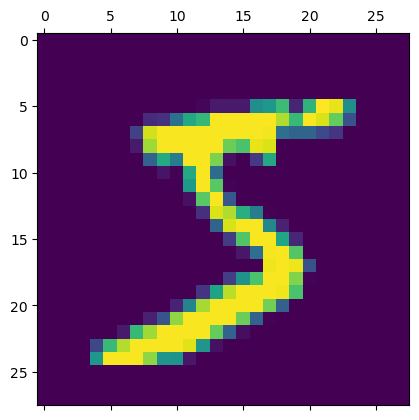

In [20]:
x_train[0].shape
print(x_train[0])
plt.matshow(x_train[0]) 

In [21]:
# Normalising the dataset
x_train =x_train/255
x_test=x_test/255

# flattening the dataset in order
# to compute for model building
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [22]:
from tensorflow.keras.utils import to_categorical

# one hot encode the labels
y_train_one_hot=to_categorical(y_train,10)
y_test_one_hot=to_categorical(y_test,10)

In [ ]:
# one hot encoding is a process of coverting categorical data, such as class labels, into a binary matrix(1s and 0s).

In [23]:
#bulinding a neural network with single layer perception.
# here we can observe as the model is a single layer perception that only 
# one layer that serves as both the input and output layer.
# there is no presence of the hidden layers.
# because all inputs are density connencted to all outputs,these layers are called dense layers

model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), # corresponds to a flattened image of size 28*28 pixels
                      activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # multi class classification
     metrics=['accuracy'])
model.fit(x_train_flatten,y_train_one_hot,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4690 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2660 - accuracy: 0.9267


In [24]:
# one hot encode the test labels
y_test_one_hot=to_categorical(y_test,10)

 #evaluate the model on the test data
test_loss,test_accuracy=model.evaluate(x_test_flatten,y_test_one_hot)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9241
Test accuracy: 0.9240999817848206


313/313 [==============================] - 0s 1ms/step


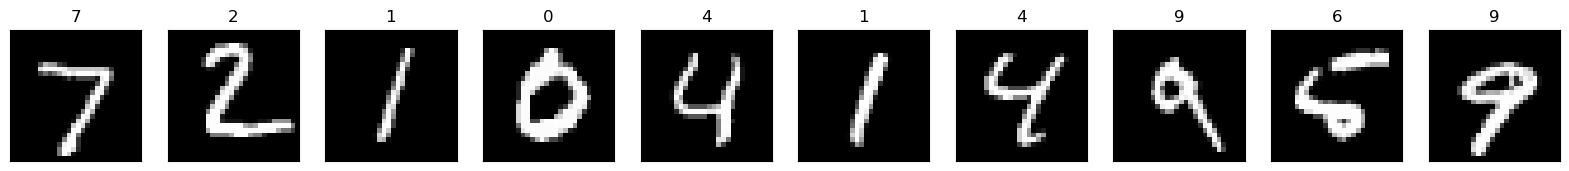

In [25]:
 # making prediction using our trained model
predictions=model.predict(x_test_flatten)
predictions=np.argmax(predictions,axis=1)

# display some predictions on test data
fig,axes=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(x_test[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()